# Reading the Iris Dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from math import sqrt


cols = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'species']
irisData = pd.read_csv('iris.csv', names=cols)
# dataset = pd.DataFrame(irisData.data, columns=data.feature_names)
print(irisData.columns)



Index(['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'species'], dtype='object')


# Label Encoding 

In [3]:
labelEncoder = preprocessing.LabelEncoder()
irisData['species'] = labelEncoder.fit_transform(irisData['species'])
print(irisData['species'].unique())

[0 1 2]


# Splitting the Dataset

In [4]:
# dataset = pd.DataFrame(irisData.data, columns=irisData.feature_names)
x = irisData.values
y = irisData['species']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Step 1: Calculating the distance from test data

In [5]:
def distance(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    dist = 0
    for i in range(len(v1)-1):
        dist = dist + ((v1[i] - v2[i]))**2
    return np.sqrt(dist)


# v1 = np.array([1, 2, 3, 4, 5])
# v2 = np.array([1, 2, 3, 4, 5])
# v3 = np.array([1, 2, 3, 3, 5])
# v4 = np.array([1, 4, 3, 4, 1])
# print(distance(v1, v2))
# print(distance(v3, v4))

# Step2: Finding the set I of k observations with smallest distances

In [6]:
def predict(k, trainSet, testInstance):
    distances = []          # list storing all the distances
    for i in range(len(trainSet)):
        dist = distance(trainSet[i][:-1], testInstance)
        distances.append((trainSet[i], dist))
    distances.sort(key=lambda x:x[1])
    
    neighbours = []   # This might be our set I
    for i in range(k):
        neighbours.append(distances[i][0])         # appending the smallest distance
        
    classes = {}
    for i in range(len(neighbours)):
        response = neighbours[i][-1]
        if response in classes:
            classes[response] = classes[response] + 1
        else:
            classes[response] = 1
            
    sortedClasses = sorted(classes.items(), key=lambda x:x[1], reverse=True)
    return sortedClasses[0][0]
        
    
# Function to check the working of predict function
def evaluation(yTrue, yPred):
    correct = 0
    for i in range(len(yTrue)):
        if yTrue[i] == yPred[i]:
            correct = correct + 1
    return correct/len(yTrue)

Importing Iris Dataset

In [7]:
from sklearn.datasets import load_iris

data = load_iris()
YIris = data.target
data = pd.DataFrame(data.data, columns=data.feature_names)
data = pd.concat([data, pd.Series(YIris)], axis=1)
data.rename(columns={0: 'class'}, inplace=True)
# print(data)

In [8]:
def trainTest(dataSet, testSize=0.25):
    test = int(len(dataSet) * testSize)
    testSet = dataSet.sample(test)
    trainSet = []
    for i in dataSet.index:
        if i in testSet.index:
            continue
        trainSet.append(dataSet.iloc[i])
        
    trainSet = pd.DataFrame(trainSet).astype(float).values.tolist()
    testSet = testSet.astype(float).values.tolist()
    return trainSet, testSet

trainSet, testSet = trainTest(data)
print(len(trainSet), len(testSet))

113 37


In [9]:
knn = 3
pred = []
for row in testSet:
    predsOnly = row[:-1]
    prediction = predict(knn, trainSet, predsOnly)
    pred.append(prediction)
    
actual = np.array(testSet)[:, -1]
predArray = np.array(pred)
evaluation(actual, predArray)

1.0

# (a) Compare all four features distribution in each iris class using boxplots 

<function matplotlib.pyplot.show>

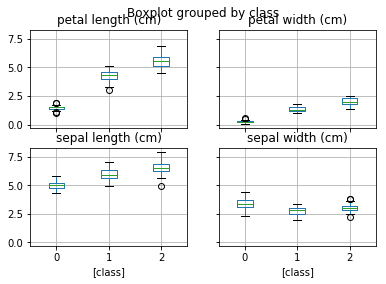

In [10]:
import matplotlib.pyplot as plt
plt.figure()
data.boxplot(by="class")
plt.show


# (b) Start with k = 1, plot the decision boundary using the first two features (Sepal length and width)

# Perform the prediction using k = 2, 4, 6, 10, 15 and plot the decision boundaries. How does the decision boundary change by increasing the number of neighbors?

KNN Classification Accuray for k=1: 0.766666666667


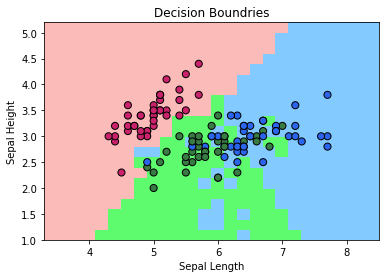

In [34]:
from matplotlib.colors import ListedColormap
# from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from decimal import Decimal


def euclideanDist(val1, val2):
    return np.sqrt(np.sum((val1-val2)**2))

def root(val, r): 
    rootVal = 1 / float(r) 
    return round (Decimal(val) ** Decimal(rootVal), 3) 
  
def minkowskiDist(x, y, pVal):   
    return (root(sum(pow(abs(a-b), pVal) 
            for a, b in zip(x, y)), pVal)) 


class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, x, y):
        self.xTrain = x
        self.yTrain = y
        
    def predict(self, x, dist):
        predList = []
        for i in x:
            predList.append(self.prediction(i, dist))
        return np.array(predList)
    
    def predictWA(self, x, dist):
        predList = []
        for i in x:
            predList.append(self.predictionWeightedAverage(i, dist))
        return np.array(predList)
    

    def prediction(self, x, distFunc):
        dist = []
        kNeighbours = []
        for xTrain in self.xTrain:
            if distFunc == "euc":
                dist.append(euclideanDist(x, xTrain))
            elif distFunc == "mink":
                dist.append(minkowskiDist(x, xTrain, 3))
            
        kIndex = np.argsort(dist)[:self.k]
        for i in kIndex:
            kNeighbours.append(self.yTrain[i])
        
        common = Counter(kNeighbours).most_common(1)
        return common[0][0]
    
    
    def predictionWeightedAverage(self, x, distFunc):
        dist = []
        kNeighbours = []
        for xTrain in self.xTrain:
            if distFunc == "euc":
                dist.append(euclideanDist(x, xTrain))
            elif distFunc == "mink":
                dist.append(minkowskiDist(x, xTrain, 3))

        kIndex = np.argsort(dist)[:self.k]
        for i in kIndex:
            kNeighbours.append(self.yTrain[i])
            
#         print(len(dist))
#         print(len(kNeighbours))
            
        for i in range(len(kNeighbours)):
            kNeighbours[i] = kNeighbours[i] * dist[i]/sum(dist)
            kNeighbours = sum(kNeighbours)
        return kNeighbours[0][0]
            
#         return sum(kNeighbours)/len(kNeighbours)
            
#         for k in neighbors:
#             knn = KNeighborsClassifier(n_neighbors=k)
#             scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
#             cv_scores.append(scores.mean())



        




cols = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'species']
irisData = pd.read_csv('iris.csv', names=cols)
labelEnc = preprocessing.LabelEncoder()
irisData['species'] = labelEnc.fit_transform(irisData['species'].values)
y = irisData['species'].values
x = irisData.drop('species', axis=1).values

color1 = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF'])
color2 = ListedColormap(['#CA226B', '#387C44', '#2B65EC'])
color3 = ListedColormap(['#8E35EF', '#FFFF00', '#659EC7'])

def accuracy(yTrue, yPred):
    acc = np.sum(yPred == yTrue) / len(yTrue)
    return acc
#
# print('ok')
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=50)

xtrain = xTrain[:, :2]
xtest = xTest[:, :2]


def predictFunc(kValue):
    knn = KNN(kValue)
    knn.fit(xtrain, yTrain)
    predicts = knn.predict(xtest, 'euc')
    print('KNN Classification Accuray for k=' + str(kValue) + ': ' + str(accuracy(yTest, predicts)))
    
    
def plotDecBoundries(kvalue, distFunc):
    h = 0.2
    model = KNN(kvalue)
    model.fit(xtrain, yTrain)

    xMin, xMax = xtrain[:, 0].min()-1, xtrain[:, 0].max()+1
    yMin, yMax = xtrain[:, 1].min()-1, xtrain[:, 1].max()+1

    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()], distFunc)
    z = z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, z, cmap = color1)
    plt.scatter(xtrain[:, 0], xtrain[:, 1], c=yTrain, cmap=color2, edgeColor='k', s=50)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Height')
    plt.title('Decision Boundries')
    
# For the value k = 1
predictFunc(1)
plotDecBoundries(1, 'euc')





KNN Classification Accuray for k=2: 0.766666666667
KNN Classification Accuray for k=4: 0.766666666667
KNN Classification Accuray for k=6: 0.733333333333
KNN Classification Accuray for k=10: 0.733333333333
KNN Classification Accuray for k=15: 0.733333333333


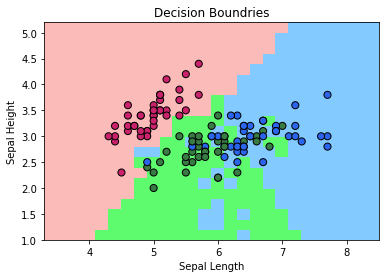

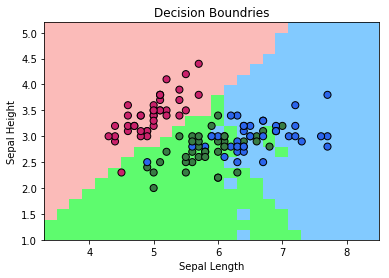

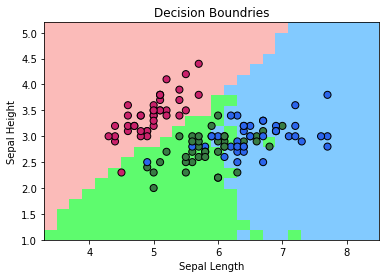

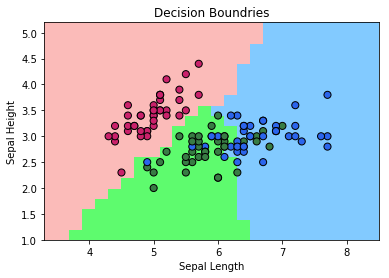

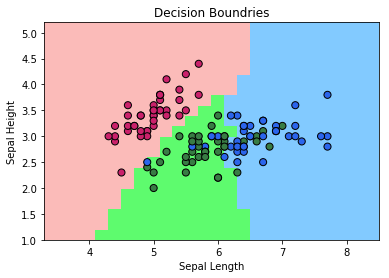

In [12]:
kValues = [2, 4, 6, 10, 15]
for kValue in kValues:
    predictFunc(kValue)
    plotDecBoundries(kValue, 'euc')

# Use a new distance measure L3 (Minkowski formula for p = 3), and redo the previous step. How does changing the distance function affect the classification?

KNN Classification Accuray for k=1: 0.966666666667
KNN Classification Accuray for k=2: 0.966666666667
KNN Classification Accuray for k=4: 0.933333333333
KNN Classification Accuray for k=6: 0.966666666667
KNN Classification Accuray for k=10: 0.933333333333
KNN Classification Accuray for k=15: 0.966666666667


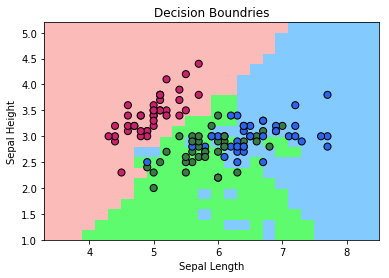

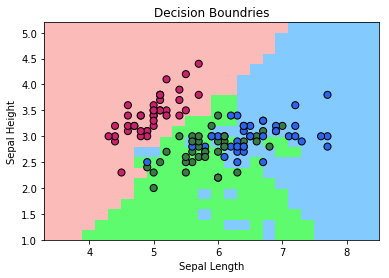

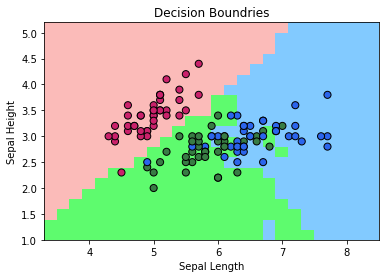

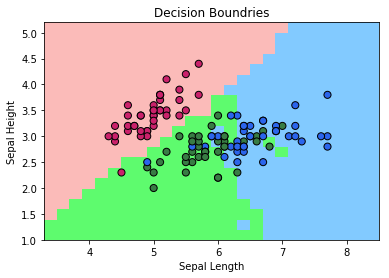

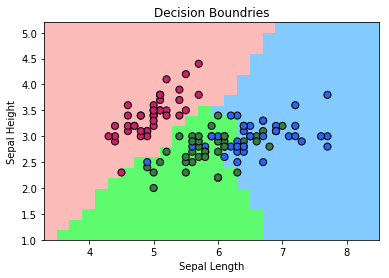

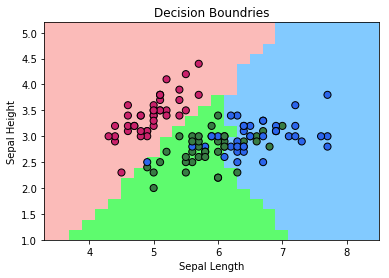

In [13]:
def predUsingMink(kValue):
    knn = KNN(kValue)
    knn.fit(xTrain, yTrain)
    predicts = knn.predict(xTest, "mink")
    print('KNN Classification Accuray for k=' + str(kValue) + ': ' + str(accuracy(yTest, predicts)))
    
kValues = [1, 2, 4, 6, 10, 15]
for kValue in kValues:
    predUsingMink(kValue)
    plotDecBoundries(kValue, 'mink')

# 2. MNIST Dataset (35 pts) MNIST consists of handwritten digit images of all numbers from zero to nine. In MNIST, each image contains a single grayscale digit drawn by hand. And each image is a 784 dimensional vector (28 pixels for both height and width) of floating-point numbers where each value represents a pixel’s brightness. The training set has 60000 examples and the test set has 10000 examples:

# (a) Perform the 2-nearest neighbors on MNIST dataset using 500, 1000, 2500, 5000, 10000, 30000, and 60000 training examples. How does the classification error change with number of training example? plot it. ( You can use 1000 test examples)


In [17]:
column = ['Label']
for i in range(1, 785):
    column.append(i)

data1train = pd.read_csv('mnist_train.csv', nrows=500, names=column)
data1test = pd.read_csv('mnist_test.csv', nrows=1000, names=column)

yData1 = data1train['Label'].values
xData1 = data1train.drop('Label', axis=1).values
yTestData1 = data1test['Label'].values
xTestData1 = data1test.drop('Label', axis=1).values
# print(yData1, xData1)
errorsList = []

def errorCalc(yTrue, yPred):
    err = 1-(np.sum(yTrue == yPred) / len(yTrue))
    return err

# 2-nearest neighbours using 500 training examples
knn = KNN(2)
knn.fit(xData1, yData1)
predicts = knn.predict(xTestData1, 'euc')
err1 = errorCalc(yTestData1, predicts)
errorsList.append(err1)
print('KNN Classification Error for k=2: ' + str(err1))



KNN Classification Error for k=2: 0.206


In [18]:
data2train = pd.read_csv('mnist_train.csv', nrows=1000, names=column)
data2test = pd.read_csv('mnist_test.csv', nrows=1000, names=column)

yData2 = data2train['Label'].values
xData2 = data2train.drop('Label', axis=1).values
yTestData2 = data2test['Label'].values
xTestData2 = data2test.drop('Label', axis=1).values

# 2-nearest neighbours using 1000 training examples
knn = KNN(2)
knn.fit(xData2, yData2)
predicts1 = knn.predict(xTestData2, 'euc')
err2 = errorCalc(yTestData2, predicts1)
errorsList.append(err2)
print('KNN Classification Error for k=2: ' + str(err2))


KNN Classification Error for k=2: 0.172


In [19]:
data3train = pd.read_csv('mnist_train.csv', nrows=2500, names=column)
data3test = pd.read_csv('mnist_test.csv', nrows=1000, names=column)

yData3 = data3train['Label'].values
xData3 = data3train.drop('Label', axis=1).values
yTestData3 = data3test['Label'].values
xTestData3 = data3test.drop('Label', axis=1).values

# 2-nearest neighbours using 1000 training examples
knn = KNN(2)
knn.fit(xData3, yData3)
predicts2 = knn.predict(xTestData3, 'euc')
err3 = errorCalc(yTestData3, predicts2)
errorsList.append(err3)
print('KNN Classification Error for k=2: ' + str(err3))

KNN Classification Error for k=2: 0.121


In [20]:
data4train = pd.read_csv('mnist_train.csv', nrows=5000, names=column)
data4test = pd.read_csv('mnist_test.csv', nrows=1000, names=column)

yData4 = data4train['Label'].values
xData4 = data4train.drop('Label', axis=1).values
yTestData4 = data4test['Label'].values
xTestData4 = data4test.drop('Label', axis=1).values

# 2-nearest neighbours using 1000 training examples
knn = KNN(2)
knn.fit(xData4, yData4)
predicts3 = knn.predict(xTestData4, 'euc')
err4 = errorCalc(yTestData4, predicts3)
errorsList.append(err4)
print('KNN Classification Error for k=2: ' + str(err4))

KNN Classification Error for k=2: 0.098


In [23]:
data5train = pd.read_csv('mnist_train.csv', nrows=10000, names=column)
data5test = pd.read_csv('mnist_test.csv', nrows=1000, names=column)

yData5 = data5train['Label'].values
xData5 = data5train.drop('Label', axis=1).values
yTestData5 = data5test['Label'].values
xTestData5 = data5test.drop('Label', axis=1).values

# 2-nearest neighbours using 1000 training examples
knn = KNN(2)
knn.fit(xData5, yData5)
predicts4 = knn.predict(xTestData4, 'euc')
err5 = errorCalc(yTestData5, predicts4)
errorsList.append(err5)
print('KNN Classification Error for k=2: ' + str(err5))

KNN Classification Error for k=2: 0.08


In [24]:
data6train = pd.read_csv('mnist_train.csv', nrows=30000, names=column)
data6test = pd.read_csv('mnist_test.csv', nrows=1000, names=column)

yData6 = data6train['Label'].values
xData6 = data6train.drop('Label', axis=1).values
yTestData6 = data6test['Label'].values
xTestData6 = data6test.drop('Label', axis=1).values

# 2-nearest neighbours using 1000 training examples
knn = KNN(2)
knn.fit(xData4, yData4)
predicts5 = knn.predict(xTestData6, 'euc')
err6 = errorCalc(yTestData6, predicts5)
errorsList.append(err6)
print('KNN Classification Error for k=2: ' + str(err6))

KNN Classification Error for k=2: 0.098


In [22]:
data7train = pd.read_csv('mnist_train.csv', nrows=60000, names=column)
data7test = pd.read_csv('mnist_test.csv', nrows=1000, names=column)

yData7 = data7train['Label'].values
xData7 = data7train.drop('Label', axis=1).values
yTestData7 = data7test['Label'].values
xTestData7 = data7test.drop('Label', axis=1).values

# 2-nearest neighbours using 1000 training examples
knn = KNN(2)
knn.fit(xData7, yData7)
predicts6 = knn.predict(xTestData7, 'euc')
err7 = errorCalc(yTestData7, predicts6)
errorsList.append(err7)
print('KNN Classification Error for k=2: ' + str(err7))

KNN Classification Error for k=2: 0.038


# (b) What is the confusion matrix of the best test?

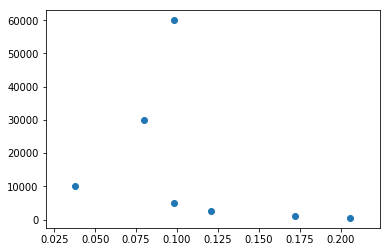

In [25]:
# print(errorsList)
x = errorsList
y = [500, 1000, 2500, 5000, 10000, 30000, 60000]
plt.scatter(x, y)
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix
# print('------ 1000 Training Values -------')
# confusion_matrix(yTestData2, predicts1)

print('------ 60000 Training Values -------')
confusion_matrix(yTestData7, predicts6)


------ 60000 Training Values -------


array([[ 84,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 125,   1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0, 110,   0,   0,   0,   1,   3,   1,   0],
       [  0,   0,   0, 101,   0,   3,   0,   2,   1,   0],
       [  0,   1,   0,   0, 105,   0,   0,   0,   0,   4],
       [  0,   0,   0,   1,   1,  85,   0,   0,   0,   0],
       [  1,   0,   0,   0,   1,   0,  85,   0,   0,   0],
       [  0,   1,   0,   2,   1,   0,   0,  94,   0,   1],
       [  1,   0,   0,   2,   0,   2,   0,   0,  83,   1],
       [  0,   0,   0,   1,   0,   0,   0,   2,   1,  90]], dtype=int64)

In [36]:
data1train = pd.read_csv('mnist_train.csv', nrows=500, names=column)
data1test = pd.read_csv('mnist_test.csv', nrows=1000, names=column)

yData1 = data1train['Label'].values
xData1 = data1train.drop('Label', axis=1).values
yTestData1 = data1test['Label'].values
xTestData1 = data1test.drop('Label', axis=1).values
# print(yData1, xData1)
errorsList = []

def errorCalc(yTrue, yPred):
    err = 1-(np.sum(yTrue == yPred) / len(yTrue))
    return err

# 2-nearest neighbours using 500 training examples
knn = KNN(2)
knn.fit(xData1, yData1)
predicts = knn.predict(xTestData1, 'euc')
print(predicts)
err1 = errorCalc(yTestData1, predicts)
errorsList.append(err1)
print('KNN Classification Error for k=2: ' + str(err1))


[7 2 1 0 9 1 9 9 4 9 0 6 9 0 1 3 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 1 5 5 1 8 4 4 6 3 5 5 0 0 4 1 9 1 7 2 4 9 7 4 0 4 3 0 7 0 2 9
 1 7 3 2 9 7 9 6 2 9 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 1 3 9 2 9 4 4 9 7 3 7 9 6 9 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 9 2
 0 1 9 9 5 5 1 5 6 0 3 1 4 6 5 4 4 8 4 5 1 9 4 7 2 3 2 1 1 9 1 8 1 2 5 0 3
 9 2 3 0 1 1 1 0 9 0 3 1 6 9 2 3 6 1 1 1 3 9 5 2 9 4 9 9 7 9 0 3 5 7 5 7 3
 2 7 1 2 8 4 1 7 3 5 5 9 7 9 2 2 4 1 5 9 8 4 7 5 0 6 4 1 4 1 9 5 7 9 2 1 2
 6 8 1 7 7 4 1 0 1 3 0 3 0 1 9 9 4 1 8 2 1 2 9 7 1 9 2 6 4 1 8 4 2 9 2 0 9
 0 0 2 8 1 7 1 9 9 0 2 9 4 5 3 0 0 3 1 7 6 5 0 3 7 1 9 3 0 9 6 0 7 1 1 1 1
 8 3 3 9 7 5 6 5 8 1 3 5 1 0 5 1 3 1 5 0 6 1 8 5 1 9 9 4 6 7 2 5 0 6 5 6 3
 9 2 0 8 8 5 9 1 1 4 0 3 3 7 6 1 6 2 1 9 2 8 6 1 4 5 1 5 4 4 2 8 3 7 2 4 9
 0 3 1 7 7 3 7 9 7 1 4 2 1 4 3 9 2 0 4 9 1 4 8 1 8 4 5 9 7 8 3 7 6 0 0 3 8
 8 0 6 4 9 3 3 3 1 8 9 1 2 6 9 0 9 6 6 6 9 8 8 2 7 5 8 9 6 1 8 4 1 2 6 3 1
 9 7 1 4 0 9 9 9 1 0 5 8 